QUESTION 1

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import numpy as np

QUESTION 1.1

In [60]:
df = pd.read_excel(r"C:\Users\ALLY ALLY\Downloads\Diabetes_Data.xlsx")

In [7]:
print(df.head())

   AGE  SEX   BMI     BP   S1     S2    S3   S4      S5  S6    Y
0   59    2  32.1  101.0  157   93.2  38.0  4.0  4.8598  87  151
1   48    1  21.6   87.0  183  103.2  70.0  3.0  3.8918  69   75
2   72    2  30.5   93.0  156   93.6  41.0  4.0  4.6728  85  141
3   24    1  25.3   84.0  198  131.4  40.0  5.0  4.8903  89  206
4   50    1  23.0  101.0  192  125.4  52.0  4.0  4.2905  80  135


In [61]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB
None


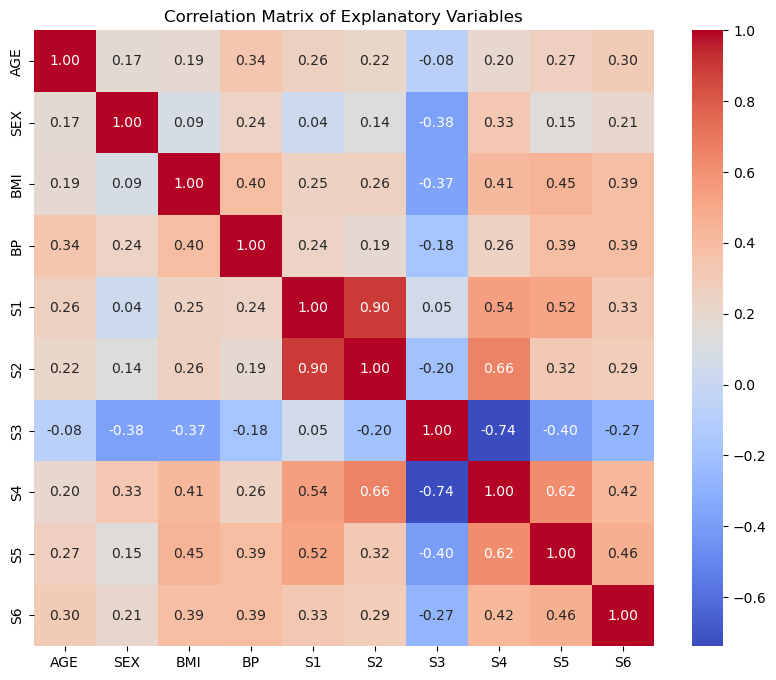

In [9]:
explanatory_vars = ['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']
corr_matrix = df[explanatory_vars].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Explanatory Variables')
plt.savefig('correlation_heatmap.png')

QUESTION 1.3

In [10]:
X = df[explanatory_vars]
X = sm.add_constant(X)
y = df['Y']

model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
adj_r2 = model.rsquared_adj

print(model.summary())
print(f"MSE: {mse}")
print(f"Adjusted R2: {adj_r2}")

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 11 Jan 2026   Prob (F-statistic):           3.83e-62
Time:                        17:16:47   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -334.5671     67.455     -4.960      0.0

QUESTION 1.5

In [11]:
def forward_selection(data, target, significance_level=0.05):
    initial_features = data.columns.tolist()
    best_features = []
    while len(initial_features) > 0:
        remaining_features = list(set(initial_features) - set(best_features))
        new_pval = pd.Series(index=remaining_features, dtype=float)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(data[best_features + [new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if min_p_value < significance_level:
            best_features.append(new_pval.idxmin())
        else:
            break
    return best_features

selected_vars = forward_selection(df[explanatory_vars], df['Y'])
print(f"Selected variables: {selected_vars}")

Selected variables: ['BMI', 'S5', 'BP', 'S1', 'SEX', 'S2']


In [12]:
X_selected = sm.add_constant(df[selected_vars])
model_selected = sm.OLS(y, X_selected).fit()
y_pred_selected = model_selected.predict(X_selected)
mse_selected = mean_squared_error(y, y_pred_selected)
r2_selected = model_selected.rsquared

print(f"MSE Selected: {mse_selected}")
print(f"R2 Selected: {r2_selected}")

MSE Selected: 2876.683251787016
R2 Selected: 0.5148837959256445


QUESTION 2

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix, accuracy_score

QUESTION 2.2

In [14]:
titanic_df = pd.read_csv(r"C:\Users\ALLY ALLY\Downloads\titanic3.csv")

In [15]:
print(titanic_df.head())

   pclass  survived                                             name     sex  \
0       1         1                    Allen, Miss. Elisabeth Walton  female   
1       1         1                   Allison, Master. Hudson Trevor    male   
2       1         0                     Allison, Miss. Helen Loraine  female   
3       1         0             Allison, Mr. Hudson Joshua Creighton    male   
4       1         0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)  female   

     age  sibsp  parch  ticket      fare    cabin embarked boat   body  \
0  29.00      0      0   24160  211.3375       B5        S    2    NaN   
1   0.92      1      2  113781  151.5500  C22 C26        S   11    NaN   
2   2.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   
3  30.00      1      2  113781  151.5500  C22 C26        S  NaN  135.0   
4  25.00      1      2  113781  151.5500  C22 C26        S  NaN    NaN   

                         home.dest  
0                     St Louis, MO  


In [16]:
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB
None


In [17]:
overall_survival_prob = titanic_df['survived'].mean()
print(f"Overall survival probability: {overall_survival_prob}")

Overall survival probability: 0.3819709702062643


QUESTION 2.3

In [18]:
# Since age is continuous, I will create age bins for the table to make it readable.
titanic_df['age_group'] = pd.cut(titanic_df['age'], bins=[0, 18, 40, 60, 100], labels=['0-18', '19-40', '41-60', '61+'])
survival_table = titanic_df.groupby(['pclass', 'sex', 'age_group'])['survived'].mean().unstack()
print("\nSurvival Probabilities Table:")
print(survival_table)


Survival Probabilities Table:
age_group          0-18     19-40     41-60       61+
pclass sex                                           
1      female  0.923077  0.971429  0.977273  0.833333
       male    0.750000  0.406250  0.312500  0.066667
2      female  0.952381  0.893939  0.812500       NaN
       male    0.523810  0.097087  0.035714  0.166667
3      female  0.534483  0.451220  0.272727  1.000000
       male    0.208333  0.174274  0.064516  0.000000


C:\Users\ALLY ALLY\AppData\Local\Temp\ipykernel_5780\3619104535.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_table = titanic_df.groupby(['pclass', 'sex', 'age_group'])['survived'].mean().unstack()


QUESTION 2.4

In [19]:
model_data = titanic_df[['survived', 'pclass', 'sex', 'age']].dropna()
logit_model = smf.logit('survived ~ C(pclass) + sex + age', data=model_data).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.469624
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                 1046
Model:                          Logit   Df Residuals:                     1041
Method:                           MLE   Df Model:                            4
Date:                Sun, 11 Jan 2026   Pseudo R-squ.:                  0.3055
Time:                        17:16:49   Log-Likelihood:                -491.23
converged:                       True   LL-Null:                       -707.31
Covariance Type:            nonrobust   LLR p-value:                 3.110e-92
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.5221      0.327     10.780      0.000       2.882       4.162
C(pclass)[T.2]   

QUESTION 2.5

In [20]:
y_prob = logit_model.predict(model_data)
y_pred = (y_prob > 0.5).astype(int)
y_true = model_data['survived']

conf_matrix = confusion_matrix(y_true, y_pred)
accuracy = accuracy_score(y_true, y_pred)

print(f"\nConfusion Matrix:\n{conf_matrix}")
print(f"Classification Accuracy: {accuracy}")


Confusion Matrix:
[[520  99]
 [126 301]]
Classification Accuracy: 0.7848948374760994


QUESTION 3

In [42]:
!pip install yfinance

In [43]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



QUESTION 3.3

In [44]:
tickers = [
 'MMM','AXP','AMGN','AAPL','BA','CAT','CVX','CSCO','KO','DIS',
 'DOW','GS','HD','HON','IBM','INTC','JNJ','JPM','MCD','MRK',
 'MSFT','NKE','PG','CRM','TRV','UNH','VZ','V','AMZN','WMT'
]

prices = yf.download(
    tickers,
    start='2020-01-01',
    end='2021-01-01'
)['Close']




[*********************100%***********************]  30 of 30 completed


In [45]:
returns = prices.pct_change().dropna()


In [46]:
corr_matrix = returns.corr()


In [47]:
scaler = StandardScaler()
returns_scaled = scaler.fit_transform(returns)

pca = PCA()
pca.fit(returns_scaled)


PCA()

In [62]:
loadings = pd.DataFrame(
    pca.components_.T,
    index=tickers,
    columns=[f'PC{i+1}' for i in range(len(tickers))]
)


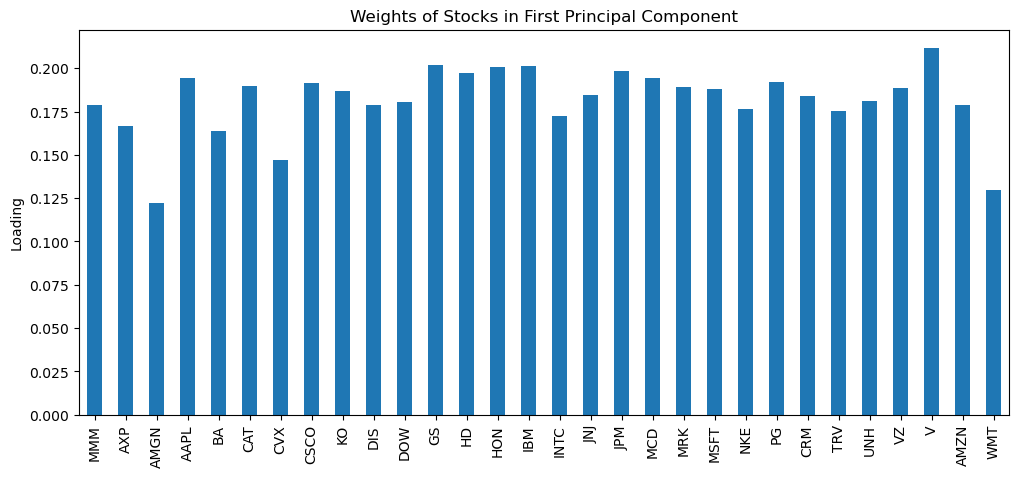

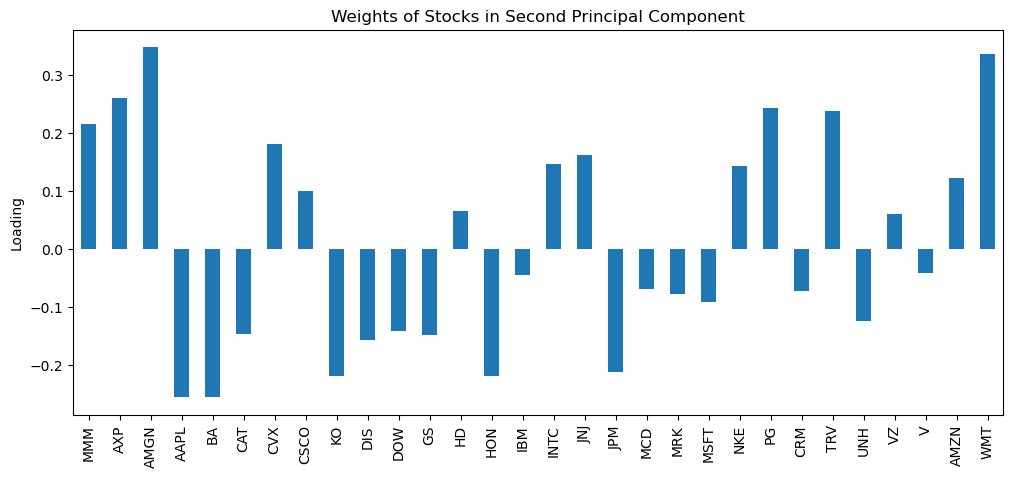

In [49]:
plt.figure(figsize=(12,5))
loadings['PC1'].plot(kind='bar')
plt.title('Weights of Stocks in First Principal Component')
plt.ylabel('Loading')
plt.show()

plt.figure(figsize=(12,5))
loadings['PC2'].plot(kind='bar')
plt.title('Weights of Stocks in Second Principal Component')
plt.ylabel('Loading')
plt.show()


QUESTION 3.4

In [50]:
explained_variance = pca.explained_variance_ratio_


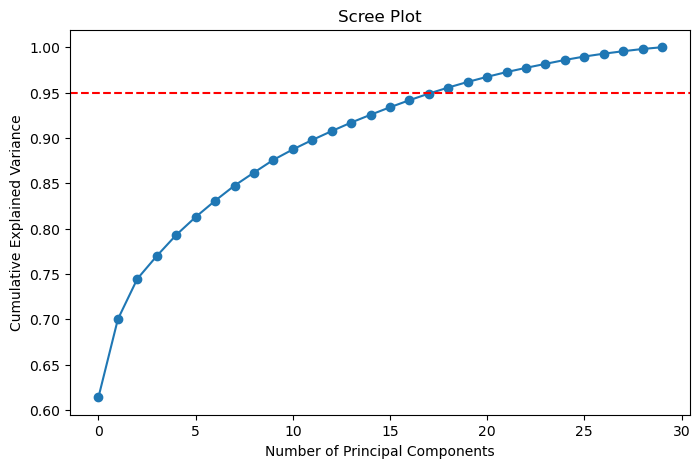

In [51]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.axhline(0.95, color='r', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()


In [52]:
num_components_95 = np.argmax(np.cumsum(explained_variance) >= 0.95) + 1
num_components_95


19

QUESTION 3.5

In [63]:
# Take loadings for PC1 and PC2 (each row = a stock)
pc_loadings = pd.DataFrame(
    pca.components_[:2].T,   
    index=returns.columns,
    columns=['PC1', 'PC2']
)


In [54]:
mean_point = pc_loadings.mean(axis=0)


In [55]:
distances = np.linalg.norm(pc_loadings - mean_point, axis=1)


In [56]:
distance_df = pd.DataFrame({
    'Stock': pc_loadings.index,
    'Distance': distances
})


In [57]:
distance_df.sort_values(by='Distance', ascending=False).head(3)


,Stock,Distance
2,AMZN,0.341690
29,WMT,0.328940
4,BA,0.267609


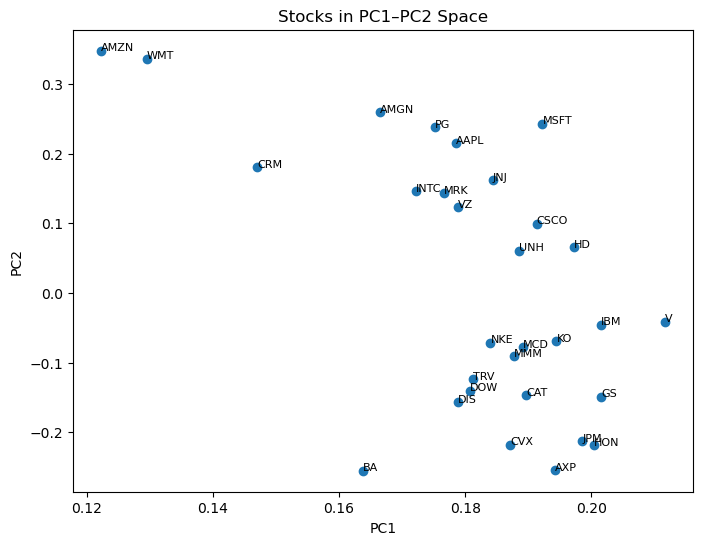

In [58]:
plt.figure(figsize=(8,6))
plt.scatter(pc_loadings['PC1'], pc_loadings['PC2'])

for stock in pc_loadings.index:
    plt.text(pc_loadings.loc[stock,'PC1'],
             pc_loadings.loc[stock,'PC2'],
             stock, fontsize=8)

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Stocks in PC1–PC2 Space")
plt.show()
